# Capstone 3 - Book Recommendation System
Data URL - https://www.kaggle.com/arashnic/book-recommendation-dataset?select=Users.csv


## Data Wrangling

Data wrangling is the second step in the Data Science Method. This step consists of multiple components including Data Collection, Data Organization, Data Definitions, and Data Cleaning.


## Exploratory Data Analysis(EDA)

EDA is the third step in the Data Science Method.  The following will be performed in this step:

1. Build data profile tables and plots
2. Outliers & Anomalies
3. Explore data relationships
4. Identification and creation of features

In [1]:
#load python packages
import os
import pandas as pd
import pandas.api.types as ptypes
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Load data files

In [2]:
df_users = pd.read_csv("Users.csv")
df_users.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [3]:
len(df_users)

278858

In [4]:
df_ratings = pd.read_csv("Ratings.csv")
df_ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
len(df_ratings)

1149780

In [6]:
df_books = pd.read_csv("Books.csv", dtype={'ISBN':object, 'Book-Title':object, 'Book-Author':object, 'Year-Of-Publication':object, 'Publisher':object,
       'Image-URL-S':object, 'Image-URL-M':object, 'Image-URL-L':object})
df_books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
len(df_books)

271360

In [8]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [9]:
df_books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

## Merge the dataframes

In [10]:
df_br = pd.merge(df_books,
             df_ratings,
             how = 'outer',
             on = 'ISBN')
df_br.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0


In [11]:
len(df_br)

1150989

In [12]:
df_br.shape

(1150989, 10)

In [13]:
df = pd.merge(df_br,
              df_users,
              how = 'outer',
              on = 'User-ID')

In [14]:
len(df)

1324564

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1324564 entries, 0 to 1324563
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1150989 non-null  object 
 1   Book-Title           1032345 non-null  object 
 2   Book-Author          1032344 non-null  object 
 3   Year-Of-Publication  1032345 non-null  object 
 4   Publisher            1032343 non-null  object 
 5   Image-URL-S          1032345 non-null  object 
 6   Image-URL-M          1032345 non-null  object 
 7   Image-URL-L          1032341 non-null  object 
 8   User-ID              1323355 non-null  float64
 9   Book-Rating          1149780 non-null  float64
 10  Location             1323355 non-null  object 
 11  Age                  946277 non-null   float64
dtypes: float64(3), object(9)
memory usage: 131.4+ MB


## Data Cleaning

In [16]:
df.drop(['Image-URL-S','Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)

In [17]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324564 entries, 0 to 1324563
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1150989 non-null  object 
 1   Book-Title           1032345 non-null  object 
 2   Book-Author          1032344 non-null  object 
 3   Year-Of-Publication  1032345 non-null  object 
 4   Publisher            1032343 non-null  object 
 5   User-ID              1323355 non-null  float64
 6   Book-Rating          1149780 non-null  float64
 7   Location             1323355 non-null  object 
 8   Age                  946277 non-null   float64
dtypes: float64(3), object(6)
memory usage: 91.0+ MB


In [19]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada",NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8.0,0.0,"timmins, ontario, canada",NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8.0,0.0,"timmins, ontario, canada",NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8.0,0.0,"timmins, ontario, canada",NaN


## Handle Null Values

In [20]:
df['ISBN'].value_counts(dropna=False)

NaN           173575
0971880107      2502
0316666343      1295
0385504209       883
0060928336       732
               ...  
034530165X         1
3411092815         1
0688126065         1
0002162857         1
0440204267         1
Name: ISBN, Length: 341766, dtype: int64

In [21]:
df['User-ID'].value_counts(dropna=False)

11676.0     13602
198711.0     7550
153662.0     6109
98391.0      5891
35859.0      5850
            ...  
2433.0          1
38927.0         1
38926.0         1
38925.0         1
2.0             1
Name: User-ID, Length: 278859, dtype: int64

In [22]:
df['Book-Rating'].value_counts(dropna=False)

0.0     716109
NaN     174784
8.0     103736
10.0     78610
7.0      76457
9.0      67541
5.0      50974
6.0      36924
4.0       8904
3.0       5996
2.0       2759
1.0       1770
Name: Book-Rating, dtype: int64

In [23]:
df.isnull().sum()

ISBN                   173575
Book-Title             292219
Book-Author            292220
Year-Of-Publication    292219
Publisher              292221
User-ID                  1209
Book-Rating            174784
Location                 1209
Age                    378287
dtype: int64

In [24]:
df = df[~df['ISBN'].isnull()]
df = df[~df['Book-Rating'].isnull()]
df = df[~df['Book-Title'].isnull()]
df = df[~df['Book-Author'].isnull()]

In [25]:
df.isnull().sum()

ISBN                        0
Book-Title                  0
Book-Author                 0
Year-Of-Publication         0
Publisher                   2
User-ID                     0
Book-Rating                 0
Location                    0
Age                    277835
dtype: int64

In [26]:
len(df)

1031135

In [27]:
df['ISBN'].value_counts(dropna=False)

0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
              ... 
081673593X       1
1578400600       1
3464522032       1
0752222694       1
0415162904       1
Name: ISBN, Length: 270150, dtype: int64

In [28]:
df['User-ID'].value_counts(dropna=False)

11676.0     11144
198711.0     6456
153662.0     5814
98391.0      5779
35859.0      5646
            ...  
215817.0        1
53954.0         1
215814.0        1
215812.0        1
2.0             1
Name: User-ID, Length: 92106, dtype: int64

In [29]:
df['Book-Rating'].value_counts(dropna=False)

0.0     647294
8.0      91803
10.0     71225
7.0      66402
9.0      60778
5.0      45355
6.0      31687
4.0       7617
3.0       5118
2.0       2375
1.0       1481
Name: Book-Rating, dtype: int64

In [30]:
df['Book-Title'].value_counts(dropna=False)

Wild Animus                                                                    2502
The Lovely Bones: A Novel                                                      1295
The Da Vinci Code                                                               898
A Painted House                                                                 838
The Nanny Diaries: A Novel                                                      828
                                                                               ... 
Rain Man. Penguin Readers Level 3 (engl.)                                         1
Getting away                                                                      1
Telling (True-to-Life Series from Hamilton High)                                  1
The Ten Demandments : Rules to Live by in the Age of the Demanding Customer       1
Gilgamesh : A New Rendering in English Verse                                      1
Name: Book-Title, Length: 241070, dtype: int64

# Questions:

1.  What is the average rating of a book?
2.  Which is the highest rated book?
3.  How many books did a user rate?
4.  What type of books were given higher ratings by a user?
5.  Is there a connection between age group and rating?

Text(0.5, 0, 'Age')

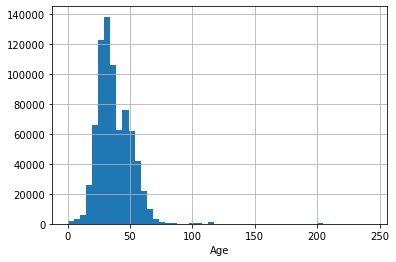

In [31]:
df['Age'].hist(bins=50)
plt.xlabel("Age")

In [32]:
df['Age'].value_counts(dropna=False)

NaN      277835
33.0      32862
29.0      30646
30.0      27201
32.0      26490
          ...  
98.0          1
105.0         1
157.0         1
109.0         1
156.0         1
Name: Age, Length: 142, dtype: int64

In [33]:
df[df['Age']>90]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
125686,0440234743,The Testament,John Grisham,1999,Dell,224764.0,0.0,"rockaway, new jersey, usa",116.0
125687,0971880107,Wild Animus,Rich Shapero,2004,Too Far,224764.0,0.0,"rockaway, new jersey, usa",116.0
125688,042511774X,Breathing Lessons,Anne Tyler,1994,Berkley Publishing Group,224764.0,0.0,"rockaway, new jersey, usa",116.0
125689,0316769487,The Catcher in the Rye,J.D. Salinger,1991,"Little, Brown",224764.0,0.0,"rockaway, new jersey, usa",116.0
125690,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,224764.0,0.0,"rockaway, new jersey, usa",116.0
...,...,...,...,...,...,...,...,...,...
1131754,0385729626,The Rag and Bone Shop,Robert Cormier,2001,Delacorte Press,142793.0,8.0,"napa, california, usa",114.0
1132635,3446199799,Ein Haus in Istrien.,Richard Swartz,2001,Carl Hanser,224876.0,8.0,"hildesheim, niedersachsen, germany",104.0
1132886,1582790671,Signature Classics - The Man in the Iron Mask,Alexandre Dumas,2000,Trident Press International,277559.0,7.0,"lake george, new york, usa",98.0
1133065,8440639228,El Principe de Las Mareas,Pat Conroy,1993,Ediciones B,166487.0,7.0,"santander, n/a, spain",103.0


In [34]:
df = df[df['Age']<90]
len(df)

750000

In [35]:
df['Age'].value_counts(dropna=False)

33.0    32862
29.0    30646
30.0    27201
32.0    26490
36.0    26096
        ...  
84.0       35
85.0       17
6.0        14
89.0        2
86.0        2
Name: Age, Length: 88, dtype: int64

Text(0.5, 0, 'Age')

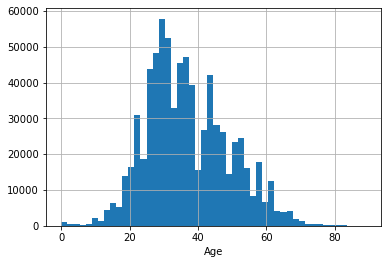

In [36]:
df['Age'].hist(bins=50)
plt.xlabel("Age")

In [37]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0,"stockton, california, usa",18.0
19,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400.0,0.0,"ottawa, ontario, canada",49.0
20,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,11400.0,9.0,"ottawa, ontario, canada",49.0
21,0151008116,Life of Pi,Yann Martel,2002,Harcourt,11400.0,6.0,"ottawa, ontario, canada",49.0
22,0671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,11400.0,0.0,"ottawa, ontario, canada",49.0


In [38]:
df.shape

(750000, 9)

In [39]:
df['Year-Of-Publication'].str.isnumeric().sum()

749998

In [40]:
df = df[df['Year-Of-Publication'].str.isnumeric()]
df.shape

(749998, 9)

In [41]:
df['Year-Of-Publication'].value_counts(dropna=False)

2002    65619
2001    57126
2003    56914
1999    53781
2000    51753
        ...  
1909        1
1376        1
2008        1
1378        1
1934        1
Name: Year-Of-Publication, Length: 109, dtype: int64

In [42]:
df['Year-Of-Publication'] = pd.to_numeric(df['Year-Of-Publication'])
df = df[df['Year-Of-Publication'] > 0]
df.shape

(739629, 9)

In [43]:
df['User-ID'] = pd.to_numeric(df['User-ID'])
df['Book-Rating'] = pd.to_numeric(df['Book-Rating'])
df['Age'] = pd.to_numeric(df['Age'])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739629 entries, 0 to 1133831
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 739629 non-null  object 
 1   Book-Title           739629 non-null  object 
 2   Book-Author          739629 non-null  object 
 3   Year-Of-Publication  739629 non-null  int64  
 4   Publisher            739627 non-null  object 
 5   User-ID              739629 non-null  float64
 6   Book-Rating          739629 non-null  float64
 7   Location             739629 non-null  object 
 8   Age                  739629 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 56.4+ MB


In [45]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0,"stockton, california, usa",18.0
19,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400.0,0.0,"ottawa, ontario, canada",49.0
20,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,11400.0,9.0,"ottawa, ontario, canada",49.0
21,0151008116,Life of Pi,Yann Martel,2002,Harcourt,11400.0,6.0,"ottawa, ontario, canada",49.0
22,0671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,11400.0,0.0,"ottawa, ontario, canada",49.0


## Average rating of books by ISBN

In [46]:
df_BR = df[['ISBN','Book-Rating']]
df_BAR = df_BR.groupby(by=['ISBN']).mean()

In [47]:
df_BAR.head()

,Book-Rating
ISBN,
0000913154,8.0
0001010565,0.0
0001046713,0.0
0001046934,0.0
0001047663,0.0


In [48]:
len(df_BAR)

224551

In [49]:
df_BAR[df_BAR['Book-Rating'] > 0.0]

,Book-Rating
ISBN,
0000913154,8.0
0001047973,9.0
000104799X,7.5
0001048082,8.0
0001056107,8.0
...,...
B0001FZGBC,7.0
B0001FZGPI,3.5
B0001FZGRQ,9.0


In [50]:
df_BAR.describe()

,Book-Rating
count,224551.000000
mean,2.821356
std,3.353877
min,0.000000
25%,0.000000
50%,1.349206
75%,5.000000
max,10.000000


## Books with the highest rating

In [51]:
df[df['Book-Rating'] == 10]['Book-Title']

31                               Five Quarters of the Orange
13734                                Interpreter of Maladies
13741                               A Tree Grows in Brooklyn
13748      The Alchemist: A Fable About Following Your Dream
13816                          Complete Chronicles of Narnia
                                 ...                        
1133761             Cuttings from the Garden of Little Fears
1133768                         The Legend of the Teddy Bear
1133770                                             12 Again
1133813                                 HeimwÃ?Â¤rts. Roman.
1133828              Rimas y leyendas (ClÃ¡sicos Fraile ; 3)
Name: Book-Title, Length: 53071, dtype: object

## How many books did a user rate?

In [82]:
df_U_I = df[['User-ID','ISBN']]

In [83]:
df_User_RateCount = pd.DataFrame(df_U_I.groupby(by=['User-ID']).count())
df_User_RateCount.head()

,ISBN
User-ID,
2.0,1
10.0,1
19.0,1
20.0,1
36.0,1


In [84]:
df_User_RateCount = df_User_RateCount.rename(columns={'ISBN':'ratings_count'})

In [85]:
df_User_RateCount['ratings_count'].describe()

count    52881.000000
mean        13.986668
std         91.548863
min          1.000000
25%          1.000000
50%          1.000000
75%          5.000000
max       6358.000000
Name: ratings_count, dtype: float64

In [86]:
df_User_RateCount[df_User_RateCount['ratings_count'] == 6358]
# Note:  Check this user's ratings

,ratings_count
User-ID,
198711.0,6358


In [92]:
df[df['User-ID'] == 198711.0]['Book-Rating'].describe()

count    6358.000000
mean        0.019346
std         0.385889
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        10.000000
Name: Book-Rating, dtype: float64

In [88]:
df_User_RateCount = df_User_RateCount[df_User_RateCount['ratings_count'] != 6358]
# Note:  Need to remove User-ID = 198711.0 from df, since this user rated almost all books as 0

In [89]:
df_User_RateCount.describe()

,ratings_count
count,52880.000000
mean,13.866698
std,87.293945
min,1.000000
25%,1.000000
50%,1.000000
75%,5.000000
max,5789.000000


In [90]:
df_User_RateCount[df_User_RateCount['ratings_count'] == 5789]

,ratings_count
User-ID,
153662.0,5789


In [93]:
df[df['User-ID'] == 153662.0]['Book-Rating'].describe()

count    5789.000000
mean        2.744170
std         4.108458
min         0.000000
25%         0.000000
50%         0.000000
75%         8.000000
max        10.000000
Name: Book-Rating, dtype: float64

In [94]:
df_User_RateCount = df_User_RateCount[df_User_RateCount['ratings_count'] != 5789]
# Note:  Need to remove User-ID = 153662.0 from df, since this user rated most of the books as 0

In [95]:
df_User_RateCount.describe()

,ratings_count
count,52879.000000
mean,13.757484
std,83.603989
min,1.000000
25%,1.000000
50%,1.000000
75%,5.000000
max,5779.000000


In [96]:
df_User_RateCount[df_User_RateCount['ratings_count'] == 5779]

,ratings_count
User-ID,
98391.0,5779


In [97]:
df[df['User-ID'] == 98391.0]['Book-Rating'].describe()

count    5779.000000
mean        8.727288
std         1.463187
min         0.000000
25%         8.000000
50%         9.000000
75%         9.000000
max        10.000000
Name: Book-Rating, dtype: float64

In [99]:
df_User_RateCount = df_User_RateCount[df_User_RateCount['ratings_count'] != 5779]
# Note:  Need to remove User-ID = 98391.0 from df, since this user ratings is also an outlier

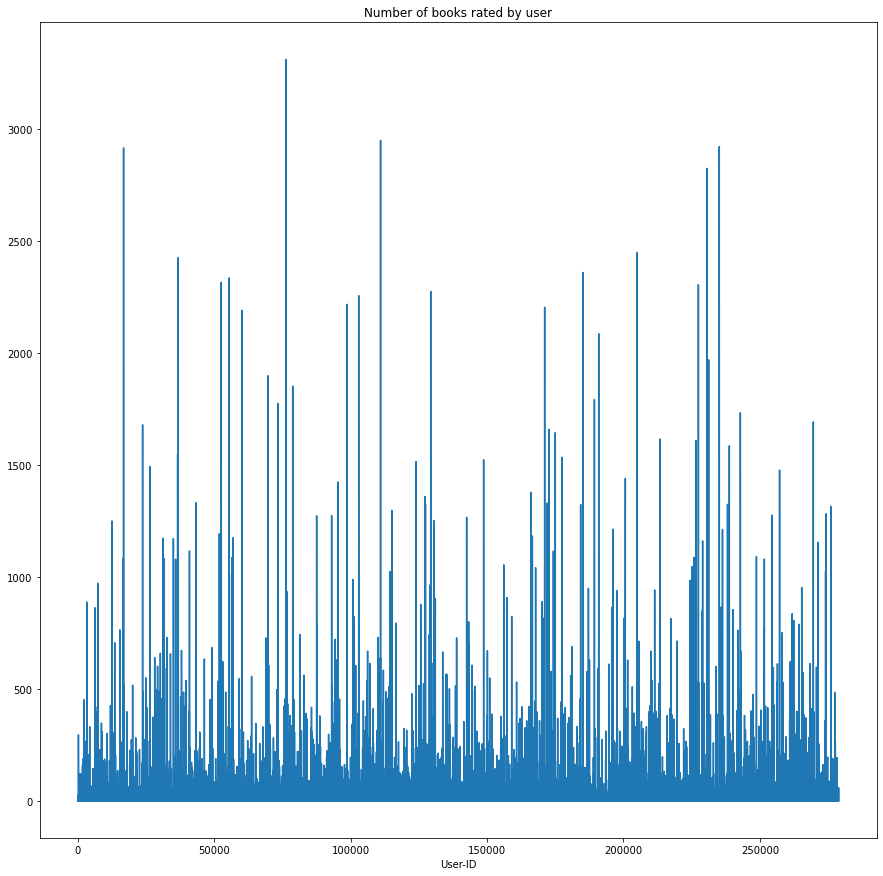

In [100]:
df_User_RateCount['ratings_count'].plot(figsize=(15,15), title='Number of books rated by user')

In [101]:
df.shape

(739629, 9)

## Removing outliers with User-ID

In [103]:
df = df[df['User-ID'] != 198711.0]
df = df[df['User-ID'] != 153662.0]
df = df[df['User-ID'] != 98391.0]
df.shape

(721703, 9)

## Books with ratings > 7

In [104]:
df[df['Book-Rating'] > 7]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
20,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,11400.0,9.0,"ottawa, ontario, canada",49.0
28,0743418174,Good in Bed,Jennifer Weiner,2002,Washington Square Press,11400.0,8.0,"ottawa, ontario, canada",49.0
31,0060958022,Five Quarters of the Orange,Joanne Harris,2002,Perennial,11400.0,10.0,"ottawa, ontario, canada",49.0
35,0446606324,The Winner,David Baldacci,1998,Warner Vision,11400.0,8.0,"ottawa, ontario, canada",49.0
40,0375506039,Open House,Elizabeth Berg,2000,Random House Trade,11400.0,8.0,"ottawa, ontario, canada",49.0
...,...,...,...,...,...,...,...,...,...
1133819,0413589307,Up for None and Coming Apart (New Theatrescripts),Barrie Keeffe,1986,Greenwood Pub Group,245241.0,8.0,"london, n/a, united kingdom",17.0
1133822,0152049266,The Window,Jeanette Ingold,2003,Harcourt Paperbacks,245444.0,8.0,"linclon, nebraska, usa",18.0
1133826,087004124X,Anthem,Ayn Rand,1966,Caxton Press,259589.0,8.0,"venice, florida, usa",19.0
1133827,158243123X,A Student of Weather,Elizabeth Hay,2001,Counterpoint Press,259591.0,8.0,"tioga, pennsylvania, usa",39.0


# Check book ratings

In [108]:
df['Book-Rating'].value_counts()

0.0     464658
8.0      61765
10.0     51118
7.0      44511
9.0      41146
5.0      26901
6.0      20999
4.0       4974
3.0       3251
2.0       1522
1.0        858
Name: Book-Rating, dtype: int64

In [109]:
464658/721703

0.6438354835714969

# 64% of the books have rating of 0.  
Choosing to not consider Book-Rating of 0.

In [111]:
df = df[df['Book-Rating'] > 0]
df.shape

(257045, 9)

## Is there a connection between age group and book rating?

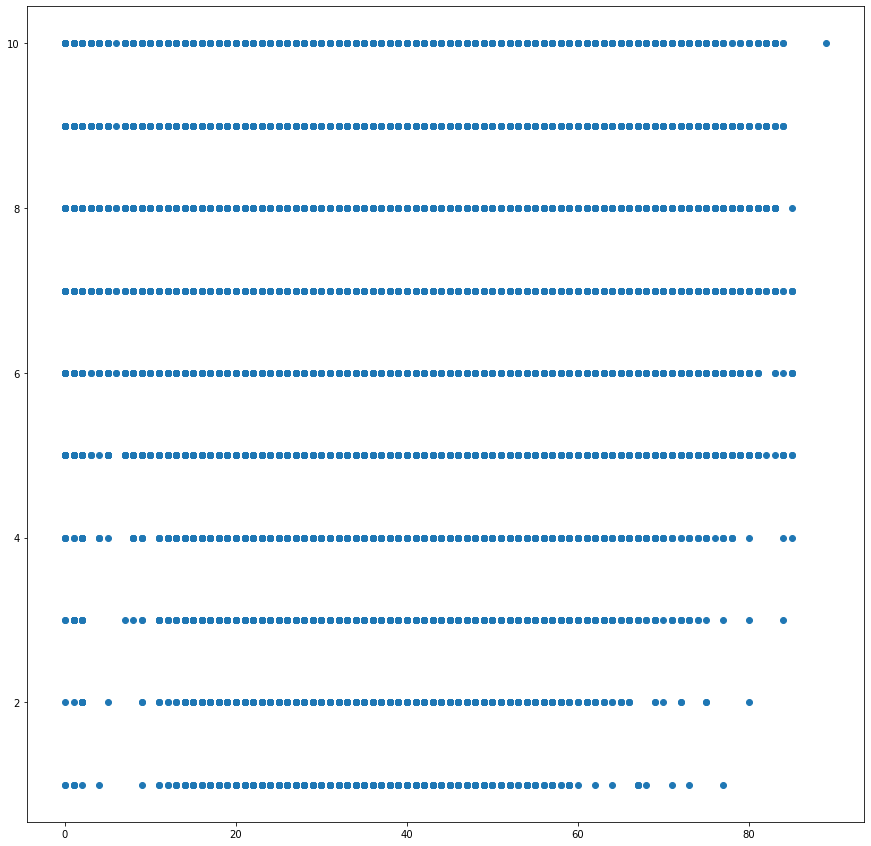

In [112]:
plt.figure(figsize=(15,15))
plt.scatter(data=df,
           x='Age',
           y='Book-Rating')

There is no connection between age and book rating.

## Save dataframe in csv file

In [113]:
df.to_csv("data/Cap3_step23_output.csv")